In [1]:
# 농수축 & 이미용 EDA
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/base_line.xlsx', header=0)
else:
    print('Not running on CoLab')
    df = pd.read_excel('c:/bc/base_line.xlsx', header=0)

Not running on CoLab


In [3]:
def group_df(group_name):
    return df[df.p_group == group_name]

def box_plot(group_name):
    times = ['MONTH','DAY_NUM','HOUR']
    features = ['total_price','sales','unit_price']
    nrows = ncols = 3

    fig, axes = plt.subplots(nrows,ncols, figsize = (18,18))

    for row, time in enumerate(times):
        for col ,feature in enumerate(features):

            g = sns.boxplot(x=time, y=feature, data=group_df(group_name), ax=axes[row,col])

In [4]:
df.columns

Index(['broadcast', 'exp_min', 'm_code', 'p_code', 'p_name', 'p_group',
       'unit_price', 'total_price', 'sales', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'SECOND', 'YEAR_DAY', 'DAY_NAME', 'DAY_NUM', 'code', 'no'],
      dtype='object')

## 전체 p_group에서 각 상품군이 차지하는 비중

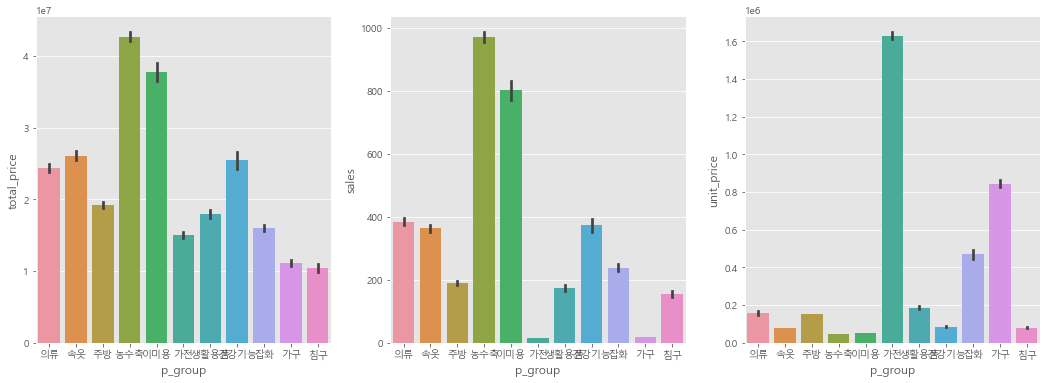

In [5]:
f, ax = plt.subplots(1,3, figsize=(18,6))
sns.barplot(y='total_price', x='p_group', data=df, ax=ax[0])
sns.barplot(y='sales', x='p_group', data=df, ax=ax[1])
sns.barplot(y='unit_price', x='p_group', data=df, ax=ax[2])

In [81]:
pd.options.display.max_rows = 12
print('농수축',len(df[df['p_group']=='농수축'].p_name.unique()),'개의 상품 존재')
print('이미용',len(df[df['p_group']=='이미용'].p_name.unique()),'개의 상품 존재')

농수축 140 개의 상품 존재
이미용 54 개의 상품 존재


- 농수축과 이미용의  total_price와 sales가 가장 높은 것을 알 수 있다.
- 그러나 단가는 가장 낮다.

→ '박리다매'의 경향이 있는 두 상품군.

- 이미용은 1년 내내 파는 상품의 종류가 적다.

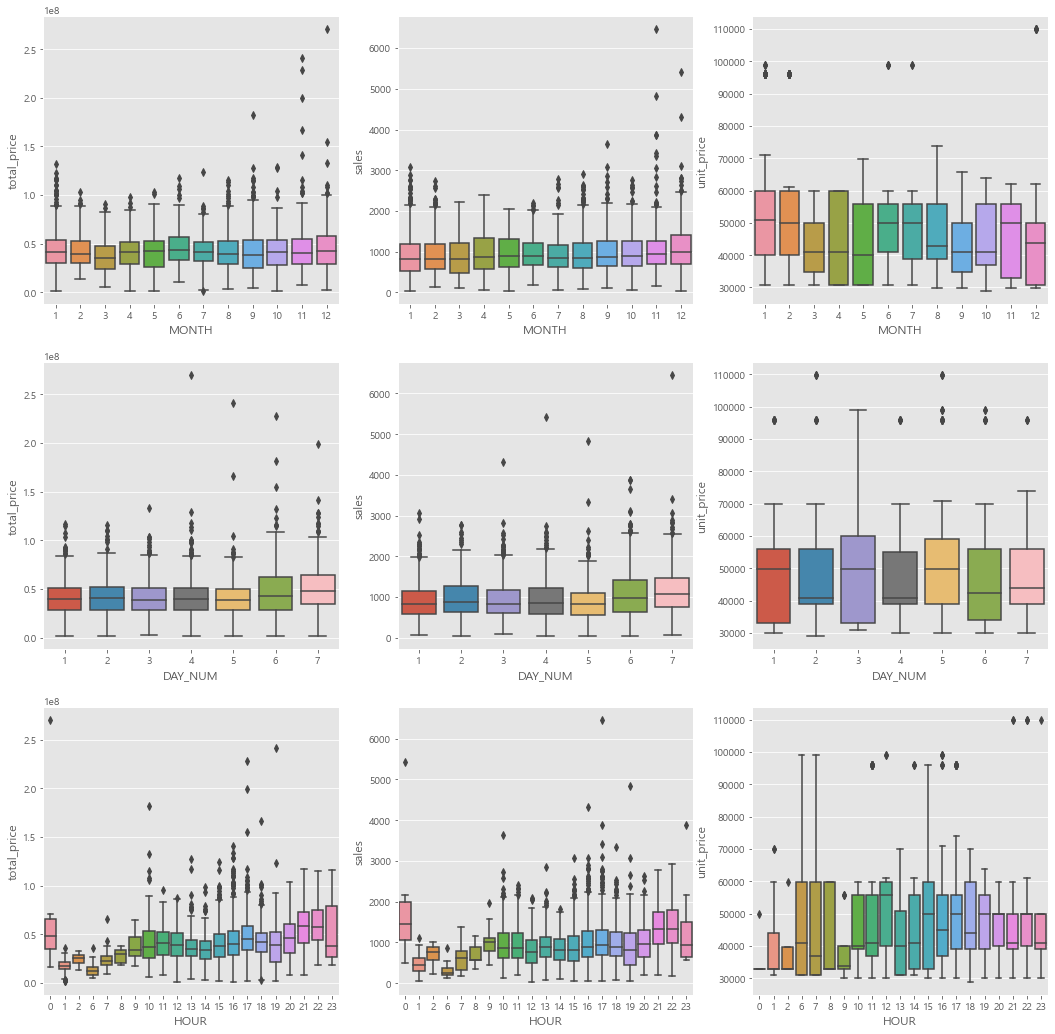

In [6]:
box_plot('농수축')

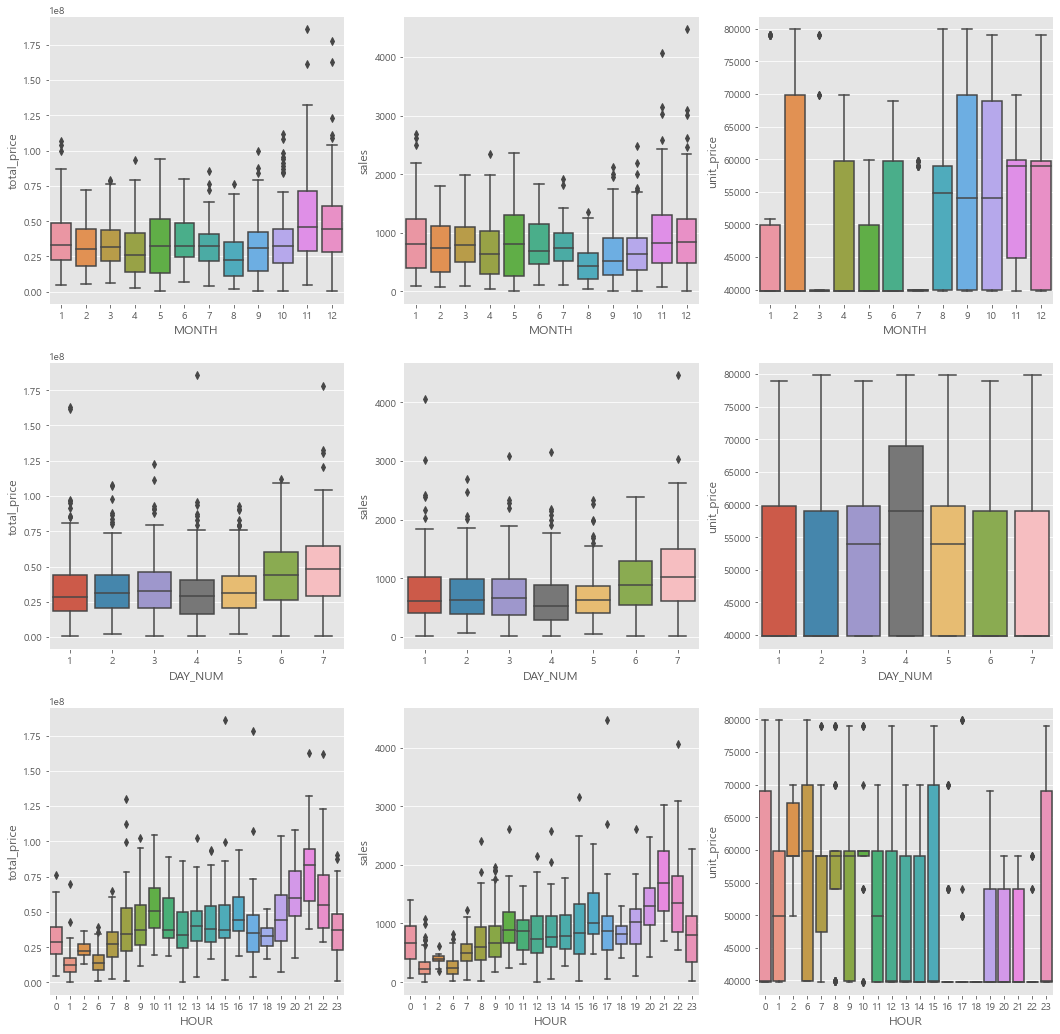

In [100]:
box_plot('이미용')

In [22]:
# def top_n1(p_group,period,n,feature):
#     return df[(df['p_group']==p_group)&(df[period]==n)]\
#             [[period,'p_name',feature]].sort_values(by=period, ascending=False)[:5]\
#             .sort_values(by=feature, ascending=False)

# 월별 total_price 살펴보기

## 농수축

In [53]:
# 각 월별 total_price top n개 상품명 확인하기
pd.options.display.max_rows = None
df_nsc_month_top10 = pd.DataFrame(columns={'MONTH','p_name','total_price'})
for i in range(1,13):
    df_nsc_month_top10 = pd.merge(df_nsc_month_top10,\
      df[(df['p_group']=='농수축')&(df['MONTH']==i)]\
            [['MONTH','p_name','total_price']].sort_values(by='total_price', ascending=False)[:5]\
          ,how='outer')
df_nsc_month_top10

,MONTH,p_name,total_price
0,1,청정수산 완도활전복 中사이즈 26미,132255000
1,1,우리바다 손질왕꼬막 24팩,122893000
2,1,제주바다 7분 손질문어,117449000
3,1,국내산 손질갑오징어 8팩,116925000
4,1,국내산 손질갑오징어 8팩,115457000
5,2,우리바다 손질왕꼬막 24팩,102698000
6,2,천수봉명인 선재 전통 메주세트,95089000
7,2,우리바다 손질왕꼬막 24팩,91316000
8,2,옛날 그 쥐포 110장 (11팩),90370000
9,2,우리바다 손질왕꼬막 24팩,88264000


각각 월별 가장 total_price가 높은 상품 5개씩을 확인해보면 위의 목록과 같다. 이 목록에서 빈번하게 등장하는 상품이 무엇인지 알아보도록 한다.

In [157]:
name_count_dict_month = {}
for idx, name in enumerate(df_nsc_month_top10.p_name):
    count = list(df_nsc_month_top10.p_name).count(df_nsc_month_top10.p_name[idx])
    name_count_dict_month[name] = count

In [158]:
nsc_month_sort = sorted(name_count_dict_month.items(), key = lambda x:x[1], reverse=True)
nsc_month_sort

[('국내산 손질갑오징어 8팩', 14),
 ('우리바다 손질왕꼬막 24팩', 10),
 ('피시원 국내산 절단 햇 꽃게 7팩', 8),
 ('피시원 국내산 절단 햇 꽃게 2.4kg', 7),
 ('국내산 손질 햇 갑오징어 9팩', 7),
 ('유귀열의 The 귀한 능이 누룽지삼계탕 8팩', 5),
 ('피시원 국내산 햇 손질문어 8팩', 5),
 ('자연산 손질 통오징어 21미', 4),
 ('AAB의 소곱창전골 800g x 8팩', 4),
 ('안동간고등어 20팩', 4),
 ('피시원 국내산 햇 손질문어 7팩', 4),
 ('청정수산 완도활전복 中사이즈 26미', 2),
 ('옛날 그 쥐포 110장 (11팩)', 2),
 ('하림뼈없는양념닭발세트', 2),
 ('참바다손질낙지100미+양념장+연포탕육수', 2),
 ('유귀열의 The귀한 소한마리찜 7팩+무료체험1팩', 2),
 ('국내산 손질 통오징어 21미', 2),
 ('멋진밥상 흥양농협 햅쌀 20kg', 2),
 ('고창 꿀 고구마 10kg', 2),
 ('제주바다 7분 손질문어', 1),
 ('천수봉명인 선재 전통 메주세트', 1),
 ('유귀열의 The 귀한 갓김치3kg+열무김치3kg, 총6kg', 1),
 ('임성근의 녹용도가니탕 풀세트', 1),
 ('자이언트킹랍스터  (점보1미+골든 2미+ 크래커)', 1)]

상품명과 등장 빈도를 내림차순하면 위와 같은데, 1년 내내 꾸준하게 높은 매출을 올리는 상품을 확인할 수 있다.
- **위 상품들은 데이터에 중복으로 표현(1시간 방송 - 20분 단위로 3번 나뉘어 표기)되어있기 때문에 처리해주어야 한다.** 하지만 처리 전이라도 어느정도의 경향은 파악할 수 있다.
- 각 상품군마다 꾸준한 매출을 올리는 품목을 구분하는 '효자상품' 피쳐를 추가하는 것은 어떨까?

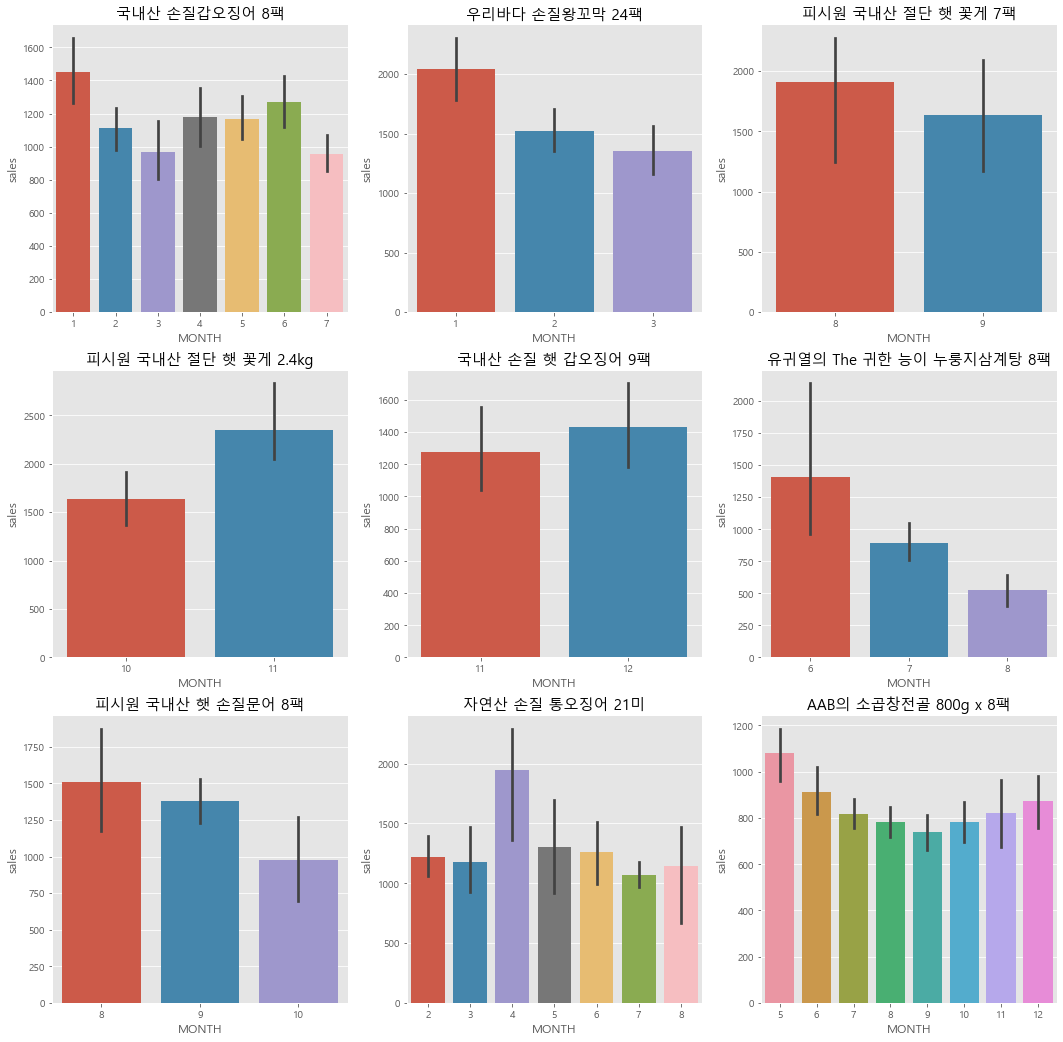

In [166]:
f, ax = plt.subplots(3,3, figsize=(18,18))
i = 0
for row in range(3):
    for col in range(3):
        f = sns.barplot(df[df.p_name == nsc_month_sort[i][0]].MONTH, \
                        df[df.p_name == nsc_month_sort[i][0]].sales, # 판매량 평균치를 나타냄.
                        ax= ax[row,col])
        f.set_title(nsc_month_sort[i][0], fontsize=15)
        i += 1

상위 9개 제품의 판매 월과 판매량을 알 수 있다.

# cf) unit_price가 높은 상품?

#### 월별 박스플랏에서 단가(유닛프라이스)가 유독 높은 상품이 나타남을 확인할 수 있다. 이 상품들은 단가가 높아도 높은 매출을 기록하는지 알아보도록 하자.
- 각 월별 단가 자료에서 상위 3개의 상품명을 추출해보도록 한다.

In [13]:
df[(df['p_group']=='농수축')&(df['MONTH']==1)][['MONTH','p_name','unit_price','total_price']].sort_values(by='unit_price', ascending=False)[:5]

,MONTH,p_name,unit_price,total_price
941,1,천수봉명인 선재 전통 메주세트,99000,76101000
940,1,천수봉명인 선재 전통 메주세트,99000,49813000
939,1,천수봉명인 선재 전통 메주세트,99000,29449000
2391,1,천수봉명인 선재 전통 메주세트,96000,74332000
2643,1,천수봉명인 선재 전통 메주세트,96000,37562000


- 메주세트가 단순히 다른 상품들에 비해서 단가가 높기에 토탈프라이스가 높게 나온것이 아닐까?
단가 대비 토탈프라이스를 고려해야하지 않을까? -> 슬랙에 메모 참조

###일단 매출을 통한 평가보다는 단가대비 매출을 고려하는 방향으로 의논해봐야할 듯.###

In [56]:
# 각 월별 total_price top n개 상품명 확인하기
pd.options.display.max_rows = None
df_nsc_unit_top3 = pd.DataFrame(columns={'MONTH','p_name','total_price','unit_price'})
for i in range(1,13):
    df_nsc_unit_top3 = pd.merge(df_nsc_unit_top3,\
      df[(df['p_group']=='농수축')&(df['MONTH']==i)][['MONTH','p_name','total_price','unit_price']]\
      .sort_values(by='unit_price', ascending=False)[:3]\
      ,how='outer')
df_nsc_unit_top3

,MONTH,p_name,total_price,unit_price
0,1,천수봉명인 선재 전통 메주세트,76101000,99000
1,1,천수봉명인 선재 전통 메주세트,49813000,99000
2,1,천수봉명인 선재 전통 메주세트,29449000,99000
3,2,천수봉명인 선재 전통 메주세트,21322000,96000
4,2,천수봉명인 선재 전통 메주세트,23262000,96000
5,2,천수봉명인 선재 전통 메주세트,87967000,96000
6,3,피시원 국내산 손질 대구 8팩 * 매운탕 양념 8팩,10936000,59900
7,3,멋진밥상 흥양농협 쌀 20kg,55101000,59900
8,3,바다먹자 국내산 손질꽃게 7팩,44393000,59900
9,4,멋진밥상 흥양농협 쌀 20kg,42164000,59900


## 이미용

In [73]:
# 각 월별 <이미용> total_price top n개 상품명 확인하기
pd.options.display.max_rows = None
df_emy_month_top10 = pd.DataFrame(columns={'MONTH','p_name','total_price'})
for i in range(1,13):
    df_emy_month_top10 = pd.merge(df_emy_month_top10,\
      df[(df['p_group']=='이미용')&(df['MONTH']==i)]\
            [['MONTH','p_name','total_price']].sort_values(by='total_price', ascending=False)[:5]\
          ,how='outer')
df_emy_month_top10

,MONTH,p_name,total_price
0,1,비버리힐스폴로클럽 남성기초세트(2018FW골드),107103000
1,1,비버리힐스폴로클럽 남성기초세트(2018FW골드),104268000
2,1,비버리힐스폴로클럽 남성기초세트(2018FW골드),99499000
3,1,비버리힐스폴로클럽 남성기초세트(2018FW골드),86954000
4,1,비버리힐스폴로클럽 남성기초세트(2018FW골드),79187000
5,2,비버리힐스폴로클럽 남성기초세트(2018FW골드),71801000
6,2,비버리힐스폴로클럽 남성기초세트(2018FW골드),68744000
7,2,비버리힐스폴로클럽 남성기초세트(2018FW골드),68696000
8,2,비버리힐스폴로클럽 남성기초세트(2018FW골드),67939000
9,2,비버리힐스폴로클럽 남성기초세트(2018FW골드),65875000


In [169]:
name_count_dict_month = {}
for idx, name in enumerate(df_emy_month_top10.p_name):
    count = list(df_emy_month_top10.p_name).count(df_emy_month_top10.p_name[idx])
    name_count_dict_month[name] = count

In [170]:
emy_month_sort = sorted(name_count_dict_month.items(), key = lambda x:x[1], reverse=True)    
emy_month_sort

[('비버리힐스폴로클럽 남성기초세트(골드+플라)', 14),
 ('비버리힐스폴로클럽 남성기초세트(2018FW골드)', 10),
 ('비버리힐스폴로클럽 남성기초세트(골드+콜라겐)', 8),
 ('바바코코 젤네일스트립 SET', 6),
 ('[VONIN]보닌 남성기초세트', 6),
 ('참존 탑뉴스 지이링클 기초세트', 6),
 ('라라츄 틴트 아이브로우 바', 5),
 ('비버리힐스폴로클럽 남성기초세트(플라센타아이크림+선크림)', 4),
 ('스포메틱스 네츄럴 선스틱', 1)]

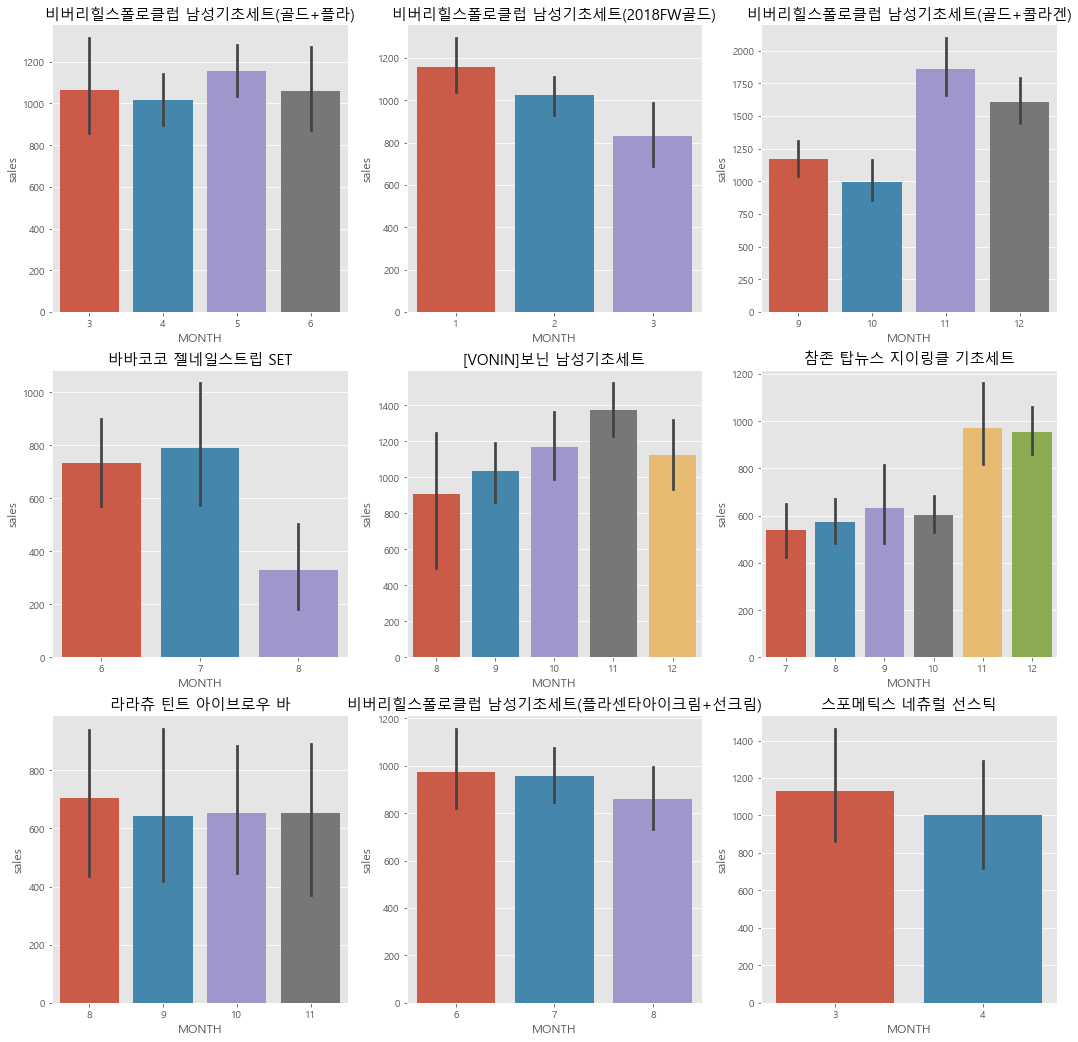

In [171]:
f, ax = plt.subplots(3,3, figsize=(18,18))
i = 0
for row in range(3):
    for col in range(3):
        f = sns.barplot(df[df.p_name == emy_month_sort[i][0]].MONTH, \
                        df[df.p_name == emy_month_sort[i][0]].sales, # 판매량 평균치를 나타냄.
                        ax= ax[row,col])
        f.set_title(emy_month_sort[i][0], fontsize=15)
        i += 1

이미용에서는 몇개 안되는 상품들을 가지고 좋은 매출을 이끌어냈음을 알 수 있다.

# 요일별 total_price 살펴보기

## 농수축

In [59]:
# 각 요일별 total_price top n개 상품명 확인하기
pd.options.display.max_rows = None
df_nsc_daynum_top10 = pd.DataFrame(columns={'DAY_NUM','p_name','total_price'})
for i in range(1,8):
    df_nsc_daynum_top10 = pd.merge(df_nsc_daynum_top10,\
      df[(df['p_group']=='농수축')&(df['DAY_NUM']==i)]\
            [['DAY_NUM','p_name','total_price']].sort_values(by='total_price', ascending=False)[:5]\
          ,how='outer')
df_nsc_daynum_top10

,DAY_NUM,p_name,total_price
0,1,국내산 손질갑오징어 8팩,116925000
1,1,피시원 국내산 햇 손질문어 8팩,114773000
2,1,피시원 국내산 햇 손질문어 8팩,107842000
3,1,국내산 손질갑오징어 8팩,103777000
4,1,피시원 국내산 햇 손질문어 8팩,92941000
5,2,국내산 손질갑오징어 8팩,115457000
6,2,우리바다 손질왕꼬막 24팩,110609000
7,2,우리바다 손질왕꼬막 24팩,110042000
8,2,하림뼈없는양념닭발세트,103993000
9,2,우리바다 손질왕꼬막 24팩,101468000


In [174]:
name_count_dict_daynum = {}
for idx, name in enumerate(df_nsc_daynum_top10.p_name):
    count = list(df_nsc_daynum_top10.p_name).count(df_nsc_daynum_top10.p_name[idx])
    name_count_dict_daynum[name] = count

In [176]:
nsc_daynum_sort = sorted(name_count_dict_daynum.items(), key = lambda x:x[1], reverse=True)
nsc_daynum_sort

[('우리바다 손질왕꼬막 24팩', 5),
 ('피시원 국내산 햇 손질문어 8팩', 4),
 ('피시원 국내산 절단 햇 꽃게 7팩', 4),
 ('국내산 손질갑오징어 8팩', 3),
 ('피시원 국내산 절단 햇 꽃게 2.4kg', 3),
 ('국내산 손질 햇 갑오징어 9팩', 3),
 ('피시원 국내산 햇 손질문어 7팩', 2),
 ('하림뼈없는양념닭발세트', 1),
 ('고창 꿀 고구마 10kg', 1),
 ('국내산 손질 통오징어 21미', 1),
 ('유귀열의 The귀한 소한마리찜 7팩+무료체험1팩', 1),
 ('자연산 손질 통오징어 21미', 1),
 ('자이언트킹랍스터  (점보1미+골든 2미+ 크래커)', 1),
 ('멋진밥상 흥양농협 햅쌀 20kg', 1),
 ('청정수산 완도활전복 中사이즈 26미', 1),
 ('안동간고등어 20팩', 1),
 ('참바다손질낙지100미+양념장+연포탕육수', 1),
 ('유귀열의 The 귀한 능이 누룽지삼계탕 8팩', 1)]

1주일로 단위를 좁혀봤을 때, 한 주에 요일에 구애받지 않고 여러번 높은 판매액을 기록한 상품이 무엇인지 알 수 있다.

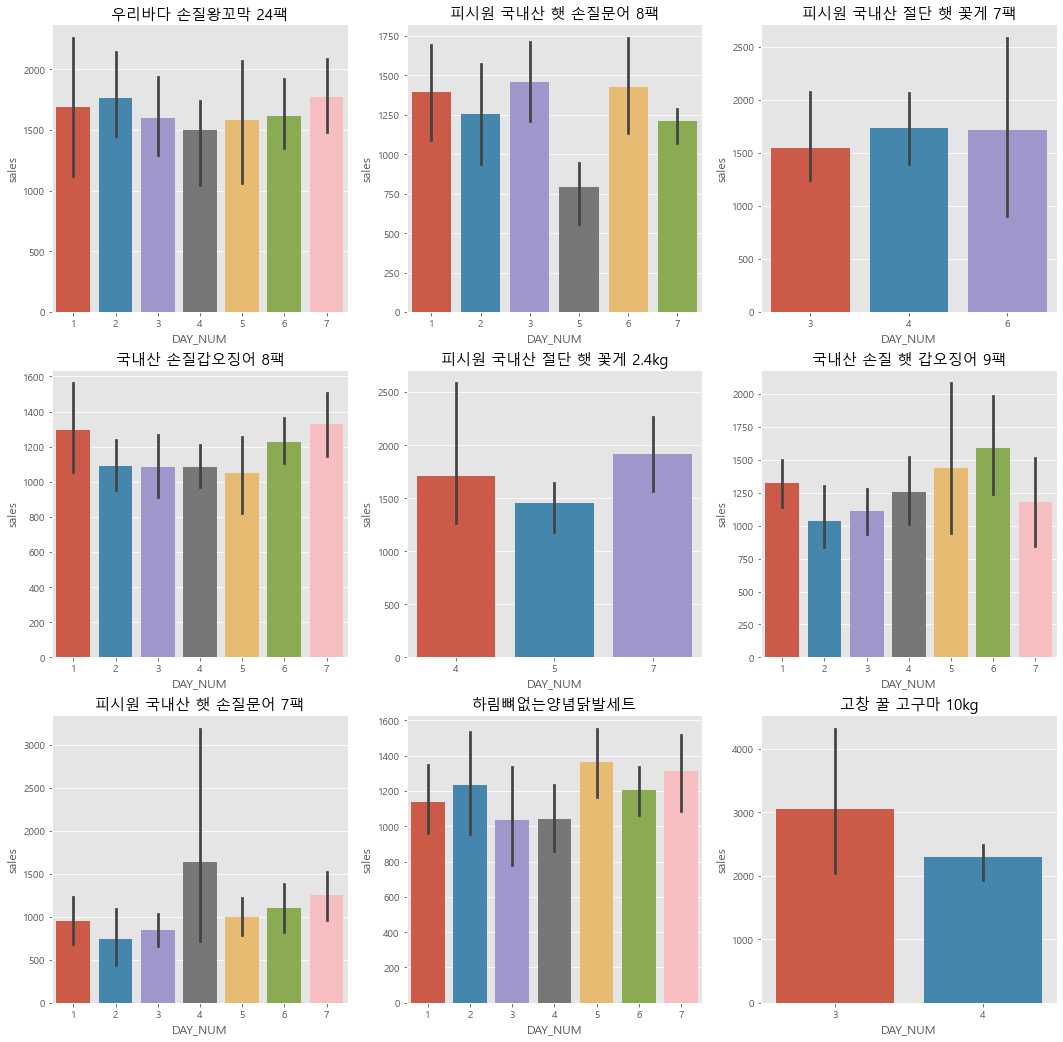

In [180]:
f, ax = plt.subplots(3,3, figsize=(18,18))
i = 0
for row in range(3):
    for col in range(3):
        f = sns.barplot(df[df.p_name == nsc_daynum_sort[i][0]].DAY_NUM, \
                        df[df.p_name == nsc_daynum_sort[i][0]].sales, # 판매량 평균치를 나타냄.
                        ax= ax[row,col])
        f.set_title(nsc_daynum_sort[i][0], fontsize=15)
        i += 1

특정 요일에만 판 상품이 무엇인지 알 수 있다.

## 이미용

In [94]:
# 각 요일별 total_price top n개 상품명 확인하기
pd.options.display.max_rows = None
df_emy_daynum_top10 = pd.DataFrame(columns={'DAY_NUM','p_name','total_price'})
for i in range(1,8):
    df_emy_daynum_top10 = pd.merge(df_emy_daynum_top10,\
      df[(df['p_group']=='이미용')&(df['DAY_NUM']==i)]\
            [['DAY_NUM','p_name','total_price']].sort_values(by='total_price', ascending=False)[:5]\
          ,how='outer')
df_emy_daynum_top10

,DAY_NUM,p_name,total_price
0,1,[VONIN]보닌 남성기초세트,162828000
1,1,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),161654000
2,1,[VONIN]보닌 남성기초세트,96832000
3,1,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),96349000
4,1,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),94934000
5,2,[VONIN]보닌 남성기초세트,108058000
6,2,비버리힐스폴로클럽 남성기초세트(2018FW골드),107103000
7,2,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),98152000
8,2,라라츄 틴트 아이브로우 바,87656000
9,2,[VONIN]보닌 남성기초세트,86531000


In [186]:
name_count_dict_daynum = {}
for idx, name in enumerate(df_emy_daynum_top10.p_name):
    count = list(df_emy_daynum_top10.p_name).count(df_emy_daynum_top10.p_name[idx])
    name_count_dict_daynum[name] = count

In [187]:
emy_daynum_sort = sorted(name_count_dict_daynum.items(), key = lambda x:x[1], reverse=True)
emy_daynum_sort

[('비버리힐스폴로클럽 남성기초세트(골드+콜라겐)', 13),
 ('[VONIN]보닌 남성기초세트', 12),
 ('참존 탑뉴스 지이링클 기초세트', 5),
 ('비버리힐스폴로클럽 남성기초세트(2018FW골드)', 3),
 ('라라츄 틴트 아이브로우 바', 2)]

IndexError: list index out of range

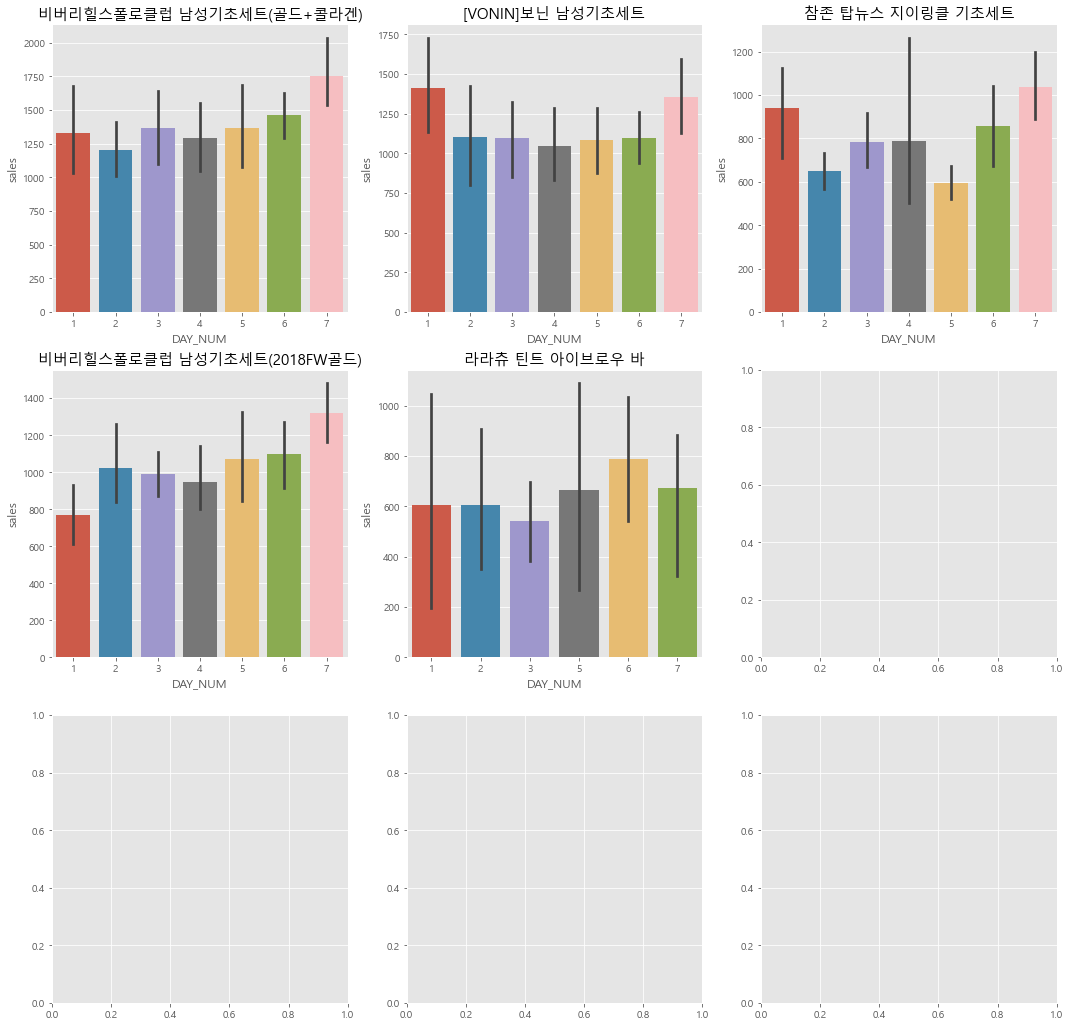

In [191]:
f, ax = plt.subplots(3,3, figsize=(18,18))
i = 0
for row in range(3):
    for col in range(3):
        f = sns.barplot(df[df.p_name == emy_daynum_sort[i][0]].DAY_NUM, \
                        df[df.p_name == emy_daynum_sort[i][0]].sales, # 판매량 평균치를 나타냄.
                        ax= ax[row,col])
        f.set_title(emy_daynum_sort[i][0], fontsize=15)
        i += 1
    

# 방송횟수

In [97]:
#상품군 별 월, 시간대, 요일별 방송 횟수 count
def monthly_time_weekday_broad_count(p_group_name):
    figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    figure.set_size_inches(15,5)

    month = df[df.p_group==p_group_name].groupby('MONTH')['unit_price'].count()
    hour = df[df.p_group==p_group_name].groupby('HOUR')['unit_price'].count()
    day_name = df[df.p_group==p_group_name].groupby('DAY_NUM')['unit_price'].count()

    sns.barplot(x=month.index, y=month.values, ax=ax1)
    sns.barplot(x=hour.index, y=hour.values, ax=ax2)
    sns.barplot(x=day_name.index, y=day_name.values, ax=ax3)

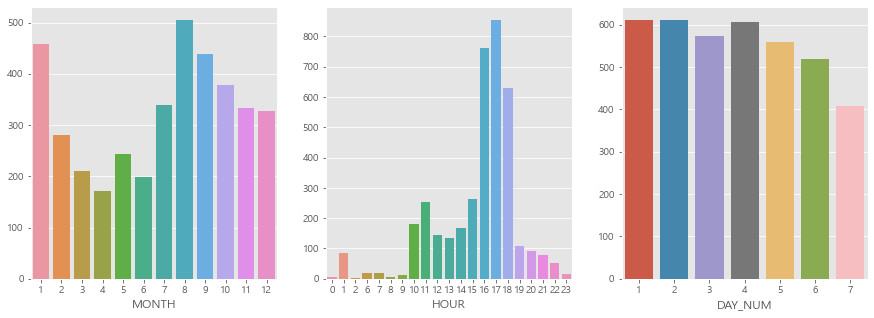

In [98]:
monthly_time_weekday_broad_count('농수축')

- 여름 - 겨울에 방송횟수 많음. -> 따라서 자연스럽게 매출도 증가한 듯.
- 저녁시간대에 방송횟수 많다. -> 저녁시간 매출도 마찬가지로 비례함을 위에서 확인 가능
- 3월에 방송횟수가 왜이렇게 낮을까? 아래 그래프에서도 3월달 평균 판매액이 가장 낮다.

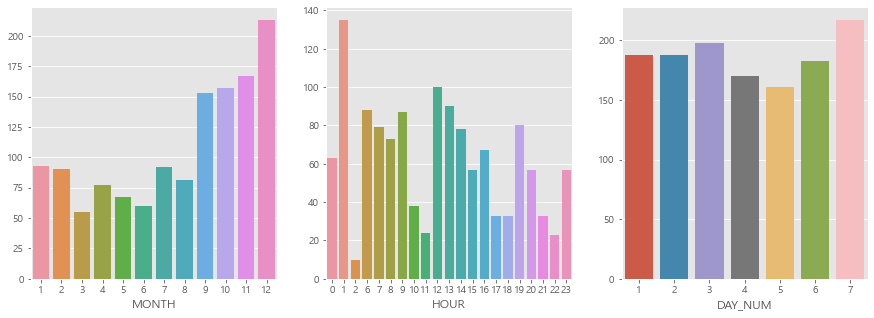

In [107]:
monthly_time_weekday_broad_count('이미용')

- 겨울로 갈수록 방송횟수가 증가한다.
- 농수축과는 반대로 일요일에 방송횟수가 많다.


In [110]:
# 특정 상품군의 월별 unit_price,total_price,sales(mean, sum)
def kinds_sum_mean(form,arg):
    figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
    figure.set_size_inches(20,10)

    m_data_sum = df[df['p_group'] == arg].groupby(form).sum()['unit_price']
    h_data_sum = df[df['p_group'] == arg].groupby(form).sum()['total_price']
    d_data_sum = df[df['p_group'] == arg].groupby(form).sum()['sales']

    m_data_mean = df[df['p_group'] == arg].groupby(form).mean()['unit_price']
    h_data_mean = df[df['p_group'] == arg].groupby(form).mean()['total_price']
    d_data_mean = df[df['p_group'] == arg].groupby(form).mean()['sales']

    sns.pointplot(x = m_data_sum.index, y = m_data_sum.values, ax = ax1)
    sns.pointplot(x = h_data_sum.index, y = h_data_sum.values, ax = ax3)
    sns.barplot(x = d_data_sum.index, y = d_data_sum.values, ax = ax5)
    
    sns.pointplot(x = m_data_mean.index, y = m_data_mean.values, ax = ax2)
    sns.pointplot(x = h_data_mean.index, y = h_data_mean.values, ax = ax4)
    sns.barplot(x = d_data_mean.index, y = d_data_mean.values, ax = ax6)
    
    ax1.set(title='sum')
    ax2.set(title='mean')

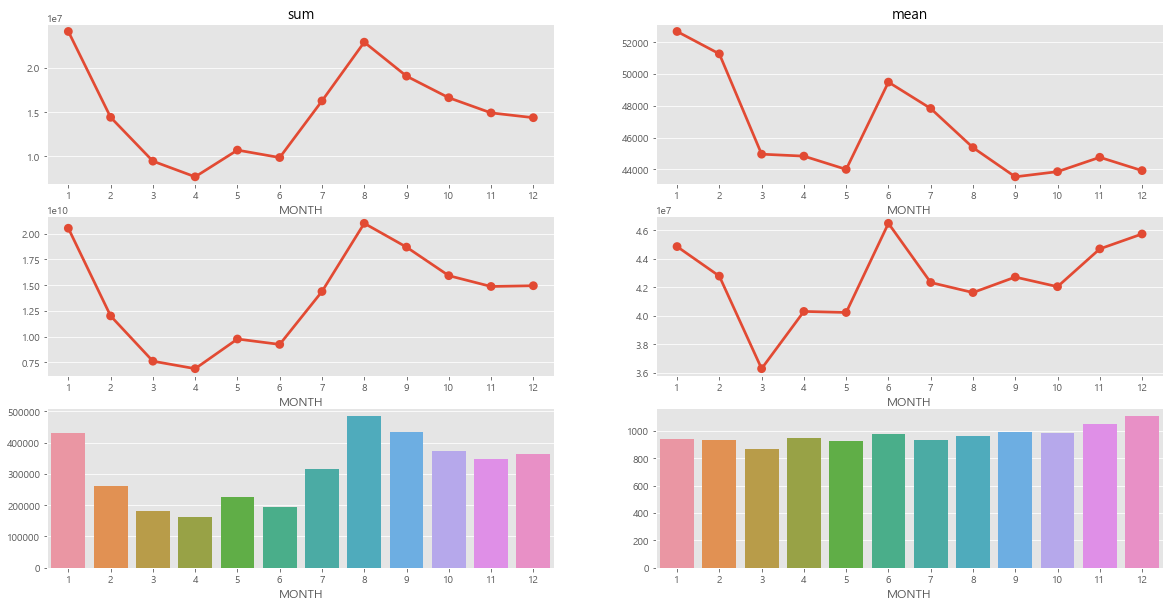

In [111]:
kinds_sum_mean('MONTH','농수축') # MONTH, HOUR, DAY_NAME중 선택

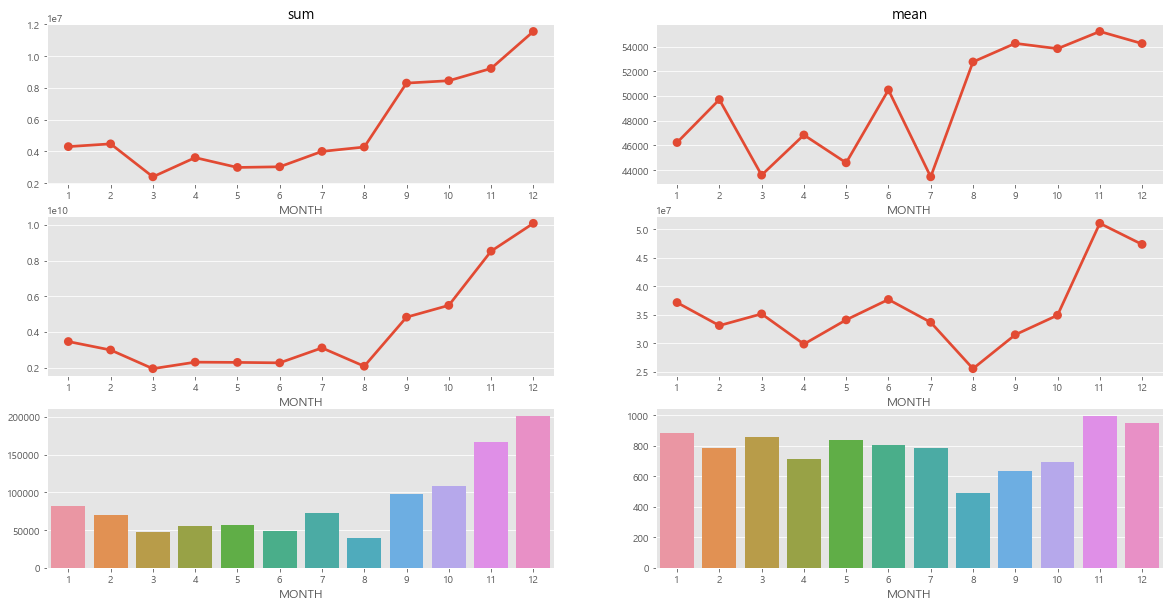

In [112]:
kinds_sum_mean('MONTH','이미용') # MONTH, HOUR, DAY_NAME중 선택

In [113]:
def exp_min_sum(arg):
    figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    figure.set_size_inches(15,5)

    m_data = df[df['p_group'] == arg].groupby('MONTH').sum()['exp_min']
    h_data = df[df['p_group'] == arg].groupby('HOUR').sum()['exp_min']
    d_data = df[df['p_group'] == arg].groupby('DAY_NAME').sum()['exp_min']

    sns.barplot(x = m_data.index, y = m_data.values, ax = ax1)
    sns.barplot(x = h_data.index, y = h_data.values, ax = ax2)
    sns.barplot(x = d_data.index, y = d_data.values, ax = ax3)

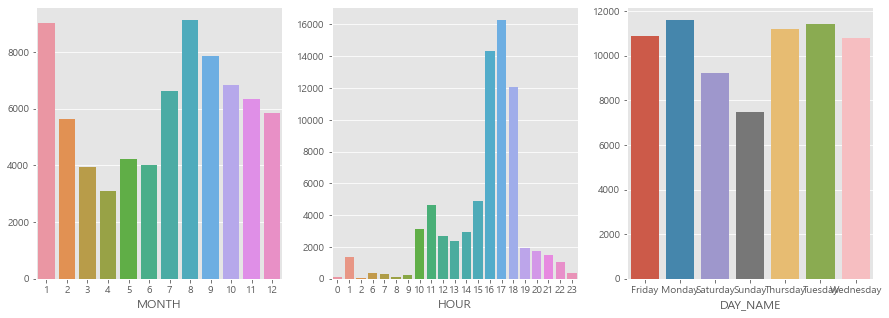

In [115]:
exp_min_sum('농수축') 
# 방송 횟수와 비례하는 경향이지 않을까? 묶어파는 상품이 많을수록 노출(분)은 낮아질 것이므로 이를 처리해준 뒤 살펴보아야하는 것 같다.

In [29]:
# 월별 데이터 자르기

In [104]:
month_name = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

data_list = []
for idx, mon in enumerate(month_name) : 
    globals()['{}_data'.format(mon)] = df[df['MONTH'] == idx+1]

[Text(0.5, 1.0, '12월 편성')]

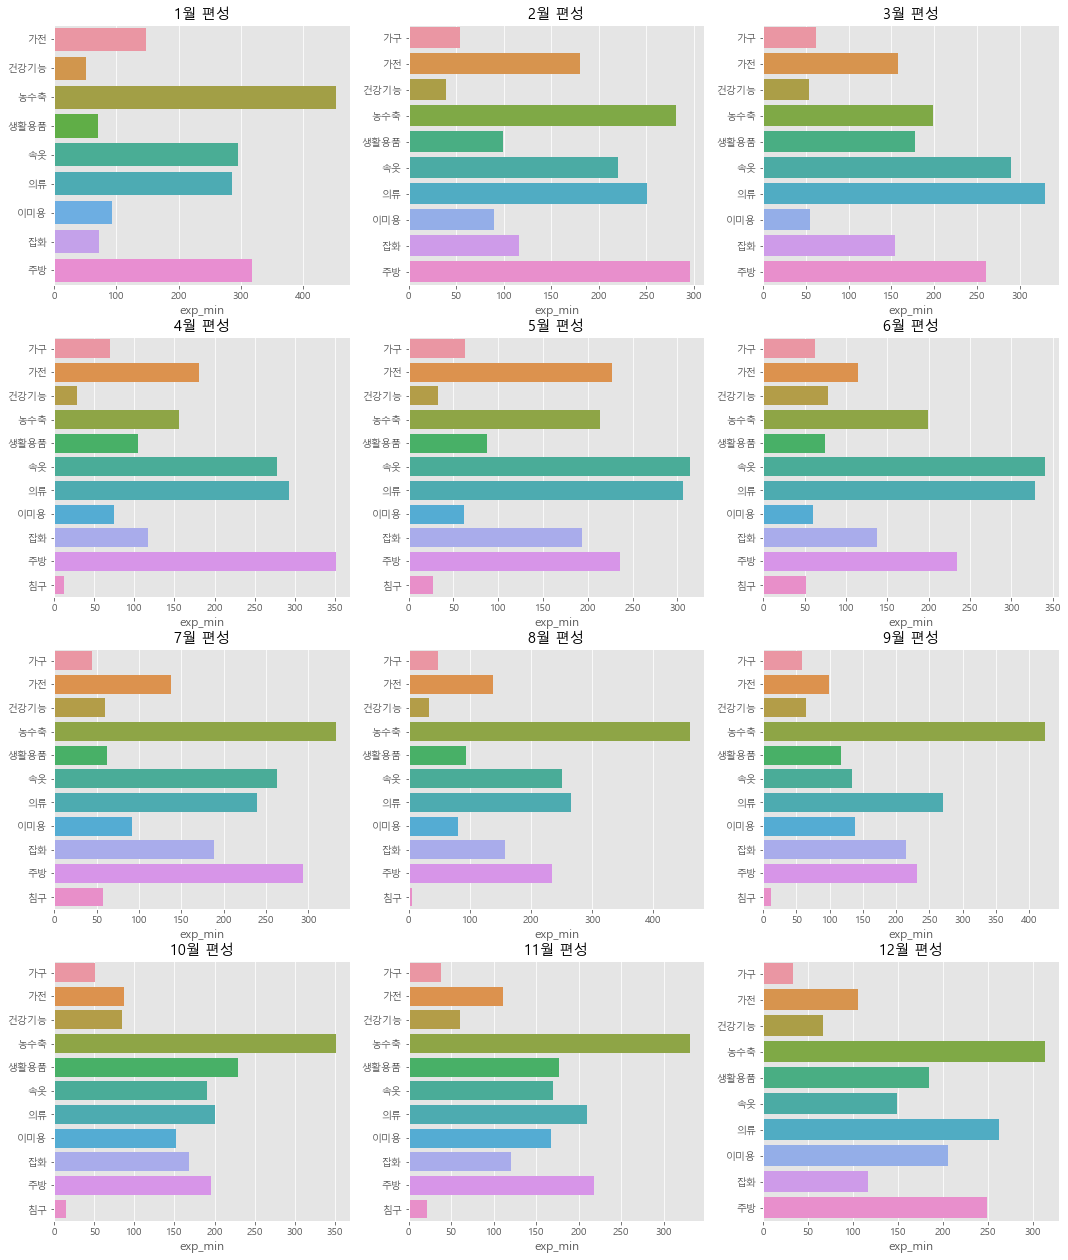

In [105]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3)
figure.set_size_inches(18,22)

sns.barplot(data = january_data, x=january_data.groupby('p_group').count()['exp_min'], y=np.unique(january_data['p_group']), ax=ax1)
sns.barplot(data = february_data, x=february_data.groupby('p_group').count()['exp_min'], y=np.unique(february_data['p_group']), ax=ax2)
sns.barplot(data = march_data, x=march_data.groupby('p_group').count()['exp_min'], y=np.unique(march_data['p_group']), ax=ax3)

sns.barplot(data = april_data, x=april_data.groupby('p_group').count()['exp_min'], y=np.unique(april_data['p_group']), ax=ax4)
sns.barplot(data = may_data, x=may_data.groupby('p_group').count()['exp_min'], y=np.unique(may_data['p_group']), ax=ax5)
sns.barplot(data = june_data, x=june_data.groupby('p_group').count()['exp_min'], y=np.unique(june_data['p_group']), ax=ax6)

sns.barplot(data = july_data, x=july_data.groupby('p_group').count()['exp_min'], y=np.unique(july_data['p_group']), ax=ax7)
sns.barplot(data = august_data, x=august_data.groupby('p_group').count()['exp_min'], y=np.unique(august_data['p_group']), ax=ax8)
sns.barplot(data = september_data, x=september_data.groupby('p_group').count()['exp_min'], y=np.unique(september_data['p_group']), ax=ax9)

sns.barplot(data = october_data, x=october_data.groupby('p_group').count()['exp_min'], y=np.unique(october_data['p_group']), ax=ax10)
sns.barplot(data = november_data, x=november_data.groupby('p_group').count()['exp_min'], y=np.unique(november_data['p_group']), ax=ax11)
sns.barplot(data = december_data, x=december_data.groupby('p_group').count()['exp_min'], y=np.unique(december_data['p_group']), ax=ax12)

ax1.set(title="1월 편성")
ax2.set(title="2월 편성")
ax3.set(title="3월 편성")
ax4.set(title="4월 편성")
ax5.set(title="5월 편성")
ax6.set(title="6월 편성")
ax7.set(title="7월 편성")
ax8.set(title="8월 편성")
ax9.set(title="9월 편성")
ax10.set(title="10월 편성")
ax11.set(title="11월 편성")
ax12.set(title="12월 편성")